# Fourier series for a square wave

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'font.size' : 16 }
pylab.rcParams.update(params)

Implement the true square shape

In [2]:
def square(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]/(2*np.pi)) % 1 < 0.50:
            y[i] = 1.0
    return y

Test the function

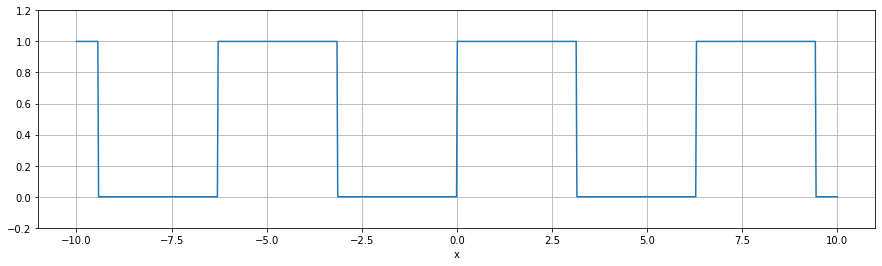

In [3]:
N = 1000
x = np.linspace(-10.0, 10.0, N)

plt.figure(figsize=(15,4))

ax=plt.subplot(1, 1, 1)
        
plt.plot(x, square(x))
ax.grid(True)
ax.set_ylim(-0.2, 1.2)
a = plt.xlabel('x')

# Fourier terms for square wave

In [4]:
def cosTerm(n):
    # Always zero except for n=0
    if n==0: return 1.0
    return 0.

def sinTerm(n):

    if n%2: # n modulo 2 = 1 (True) then Odd
        ret = 2. / (n* np.pi)
    else:
        ret = 0.
    return ret

In [5]:
def fourier(n,x):
    #a_0 term, remember 1/2
    sum = cosTerm(0)/2.0 * np.ones(len(x))
    
    #all other terms
    for i in range(1, n+1):
        sum += sinTerm(i)*np.sin(i*x) + cosTerm(i)*np.cos(i*x)
    return sum

Demonstrate that the implementation is working

In [6]:
def squarePlot(logmaxterm):

    import math
    
    maxterm = int(math.exp(logmaxterm)/2)
    
    N = 20*maxterm+100
    x = np.linspace(-10.0, 10.0, N)

    plt.figure(figsize=(15,12))

    ax=plt.subplot(1, 1, 1)
        
    plt.plot(x, fourier(maxterm,x))
    ax.set_ylim(-0.2, 1.2)
    ax.grid(True)
    plt.xlabel('x')
    plt.legend(['n = %d' % maxterm])

In [7]:
#make a slider widget using the function
import ipywidgets as widgets

widgets.interact(squarePlot, logmaxterm=widgets.IntSlider(description='Terms',value=0,min=0,max=10,step=1));


interactive(children=(IntSlider(value=0, description='Terms', max=10), Output()), _dom_classes=('widget-intera…